# Nomralized Cut
*by Zeyad Zakaria*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Pattern Recognition/Assignment 2
%ls

/content/drive/MyDrive/Pattern Recognition/Assignment 2
 dataset/                 Kmean_V2.ipynb          PR_Assignment2.pdf
 Evaluation.ipynb        'Normalized Cut.ipynb'
'Iris Evaluation.ipynb'   PR_Assignment2.gdoc


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,SpectralClustering
from sklearn.metrics.pairwise import rbf_kernel
from collections import Counter
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

## Reading Dataset

In [ ]:
# reading the data
training = pd.read_csv('dataset/kddcup.data.gz', header=None)
training = training.drop_duplicates()

# testing = pd.read_csv('dataset/corrected.gz', header=None)
# testing = testing.drop_duplicates()


In [ ]:
with open('dataset/kddcup.names.txt', 'r') as f:
    feature_names = f.read()

feature_names = feature_names.split('\n')[1:-1]  # split the string by newline characters and remove first and last elements
feature_names = [feature.split(':')[0] for feature in feature_names]  # extract the feature name from each element

print("len(feature_names) =",len(feature_names))
print(feature_names)

len(feature_names) = 41
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']


In [ ]:
training.columns =feature_names + ['label']
print("training.head()=\n",training.head().to_string(index=False))
print("training.shape =",training.shape)

training.head()=
  duration protocol_type service flag  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  num_failed_logins  logged_in  num_compromised  root_shell  su_attempted  num_root  num_file_creations  num_shells  num_access_files  num_outbound_cmds  is_host_login  is_guest_login  count  srv_count  serror_rate  srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  diff_srv_rate  srv_diff_host_rate  dst_host_count  dst_host_srv_count  dst_host_same_srv_rate  dst_host_diff_srv_rate  dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  dst_host_srv_rerror_rate   label
        0           tcp    http   SF        215      45076     0               0       0    0                  0          1                0           0             0         0                   0           0                 0                  0              0               0      1          1          0.0              0.0       

## Adjusting Dataset

### Encoding

In [ ]:
codes,labels = pd.factorize(training['label'])
print("len(labels) =",len(labels))


len(labels) = 23


In [ ]:
# convert the labels to numerical values
# protocol_type, service, and flag are categorical features

# protocol_type
codes, protocol_type_map = pd.factorize(training['protocol_type'])
training['protocol_type'] = codes

# service
codes, service_map = pd.factorize(training['service'])
training['service'] = codes

# flag
codes, flag_map = pd.factorize(training['flag'])
training['flag'] = codes

# label
codes, label_map = pd.factorize(training['label'])
training['label'] = codes

### Replacement of string categories into numerical categories

In [ ]:
# remove the last column of training and testing data
# assign last column to training_labels and testing_labels

y_training = training.iloc[:, -1]
training = training.iloc[:, :-1]

In [ ]:
print("training.shape =",training.shape)
print("y_training.shape =",y_training.shape)

training.shape = (1074992, 41)
y_training.shape = (1074992,)


### Set the random seed across all experiments to 42

In [ ]:
random.seed(42)

### Split the training dataset used using train test split in sklearn, and take only 0.5% of the data in the new training set. Be sure you set stratify = True.

In [ ]:
new_training, _, y_new_training, _ = train_test_split(training, y_training, train_size=0.005, stratify=y_training)
# convert to numpy
new_training = new_training.to_numpy()
y_new_training =  y_new_training.to_numpy()
# print 
print("new_training.shape =",new_training.shape)
print("y_new_training.shape =",y_new_training.shape)

new_training.shape = (5374, 41)
y_new_training.shape = (5374,)


In [ ]:
print("Unique labels =",len(np.unique(y_new_training)))

Unique labels = 11


## Normalized Cut

### using built-in Spectral Clustering

In [1]:
K = rbf_kernel(new_training, gamma=1/41)

fig = plt.figure(figsize=(10, 10))

plt.imshow(K)
# plt.show()
plt.close()

NameError: ignored

### implementing rbf

In [ ]:
# print shape of first column of new_training
n = new_training.shape[0]
gamma = 1/41
print(n)
k = 23 # number of clusters

K = np.zeros((n, n))  # Kernel matrix
for i in range(n):
    for j in range(n):
        # RBF Kernel
        K[i, j] = np.exp(-gamma * np.linalg.norm(new_training[i, :] - new_training[j, :])**2)

# plot Kernel matrix
fig = plt.figure(figsize=(10, 10))
# plt.imshow(K)

D = np.sum(K, axis=1) # degree matrix
D = np.diag(D)  # degree matrix is diagonal
print("D.shape = ", D.shape)

5374
D.shape =  (5374, 5374)


<Figure size 1000x1000 with 0 Axes>

In [ ]:
D = np.sum(K,axis=1) # degree matrix
D = np.diag(D)  # degree matrix is diagonal
print("D.shape = ",D.shape)

L = D - K # Laplacian matrix

# Getting cut matrix
# Lc = λ Δc
# Ax = λx
A = np.dot(np.linalg.inv(D), L)
# print("A=\n", A)
eigen_values, eigen_vectors = np.linalg.eig(A.real)

# sort eigenvalues and eigenvectors
idxes = np.argsort(eigen_values)
eigen_values = eigen_values[idxes]
eigen_vectors = eigen_vectors[:, idxes]

eigen_vectors = eigen_vectors[:, :k]  # get first k eigenvectors
# print("eigen_vectors=\n", eigen_vectors[:3])

norm_vectors = normalize(eigen_vectors.real, axis=1) # normalize eigenvectors
# print("norm_vectors=\n", norm_vectors[:3])


D.shape =  (5374, 5374)


In [ ]:
k= 11
kmeans = KMeans(n_clusters=k, n_init='auto').fit(norm_vectors)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
for i in range(k):
        ax.scatter(norm_vectors[kmeans == i, 0], norm_vectors[kmeans == i, 1],
                   norm_vectors[kmeans == i, 2], label=i)
# To close the plot
plt.close()

## Anomoly detection

In [ ]:
y_pred =  kmeans.labels_
y_true = y_new_training

In [ ]:
print(Counter(y_true))
print(Counter(y_pred))

Counter({0: 4063, 4: 1211, 15: 25, 10: 19, 9: 18, 5: 15, 17: 8, 13: 5, 8: 5, 20: 4, 7: 1})
Counter({0: 1371, 3: 761, 9: 559, 5: 433, 2: 385, 7: 363, 6: 361, 4: 304, 10: 291, 1: 278, 8: 268})


## Evaluating

In [ ]:
# Function to calculate the precision, recall and F1 score
def get_precision_recall_f1_score(k, y_pred, y_true):
    # check if y_pred and y_true are a numpy array
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    
    P = np.zeros(k)
    R = np.zeros(k)
    F = np.zeros(k)
    
    for i in range(k):
        # get indices of points in cluster i
        indices = np.where(y_pred == i)
 
        # get the most frequent label in cluster i
        most_frequent_label = np.bincount(y_true[indices]).argmax()
        # get the number of points in cluster i that have the most frequent label
        number_of_points = np.sum(y_true[indices] == most_frequent_label)
        
        # get the number of points in cluster i
        number_of_points_in_cluster = len(indices[0])
        # Precision P = TP / (TP + FP)
        P[i] = number_of_points / number_of_points_in_cluster
        
        # get the number of points that have the most frequent label
        number_of_points_with_most_frequent_label = np.sum(
            y_true == most_frequent_label)
        # Recall R = TP / (TP + FN)
        R[i] = number_of_points / number_of_points_with_most_frequent_label
        
        # F1 score = 2 * P * R / (P + R)
        F[i] = 2 * P[i] * R[i] / (P[i] + R[i])
        
    # Average F1 score
    # F = np.mean(F)
    
    return P, R, F


In [ ]:
# calling the function
P, R, F = get_precision_recall_f1_score(k,y_pred, y_true)
print("P = ", P.mean())
print("R = ", R.mean())
print("F = ", F.mean())

P =  0.9689991670920016
R =  0.17788231125851467
F =  0.2426503126738538


In [ ]:
print(F)

[0.92951201 0.12531675 0.17311151 0.31135987 0.13373025 0.19128114
 0.14918626 0.15996385 0.12329716 0.2410212  0.13137345]


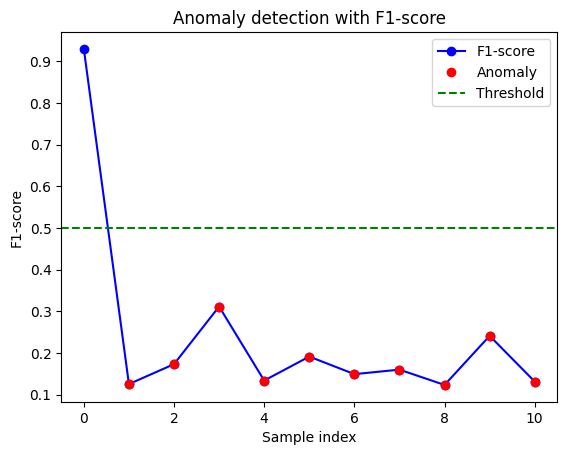

In [ ]:
# Identifying threshold
f1_scores = F 
threshold = 0.5
anomalies = f1_scores < threshold

# Plot the F1-scores
plt.plot(f1_scores, 'b-o', label='F1-score')

# Highlight the anomalies in red
plt.plot(np.where(anomalies)[0], f1_scores[anomalies], 'ro', label='Anomaly')

# Add a horizontal line at the threshold
plt.axhline(threshold, linestyle='--', color='g', label='Threshold')

# Add labels and title
plt.xlabel('Sample index')
plt.ylabel('F1-score')
plt.title('Anomaly detection with F1-score')

# Add a legend
plt.legend()

plt.show()


In [ ]:
def conditional_entropy(k, y_pred, y_true):
    # check if y_pred and y_true are a numpy array
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    
    # Get conditional entropy
    H = np.zeros(k)
    # Total entropy
    Ht = 0
    for i in range(k):
        # get indices of points in cluster i
        indices = np.where(y_pred == i)
        
        # get the frequency of each label in cluster i
        frequency = np.bincount(y_true[indices])
        # print("frequency = ", frequency)
        
        # get the probability of each label in cluster i
        probability = frequency / len(indices[0])
        # print("probability = ", probability)
        # Eliminate zero probability
        probability = probability[probability > 0]
        
        # get the entropy of each label in cluster i
        entropy= -probability * np.log10(probability)
        # print("entropy = ", entropy)
        
        # get the conditional entropy of cluster i
        H[i] = np.sum(entropy)
        # print("H[i] = ", H[i])
        
        # get the total entropy 
        Ht += H[i] * len(indices[0]) / len(y_true)
        # print("H[i] * len(indices[0]) / len(y_true) = ", H[i] * len(indices[0]) / len(y_true))
        
    return H, Ht

In [ ]:
# calling the function
H, Ht = conditional_entropy(k, y_pred, y_true)
print("H = ", H)
print("Ht = ", Ht)

H =  [0.20033191 0.05985486 0.         0.04115894 0.09548931 0.02126518
 0.17410876 0.05783984 0.01067768 0.01138078 0.04145682]
Ht =  0.08671190052301589


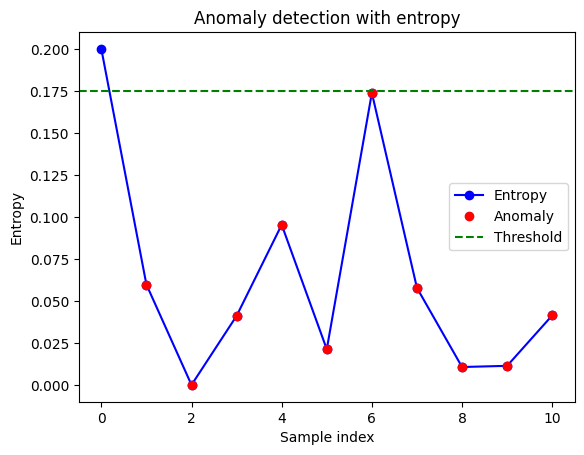

In [ ]:
# Anomaly detection with Entropy
entropy = H

# Define the threshold for anomaly detection
threshold = 0.175

# Detect anomalies
anomalies = entropy < threshold

# Plot the entropy values
plt.plot(entropy, 'b-o', label='Entropy')

# Highlight the anomalies in red
plt.plot(np.where(anomalies)[0], entropy[anomalies], 'ro', label='Anomaly')

# Add a horizontal line at the threshold
plt.axhline(threshold, linestyle='--', color='g', label='Threshold')

# Add labels and title
plt.xlabel('Sample index')
plt.ylabel('Entropy')
plt.title('Anomaly detection with entropy')

# Add a legend
plt.legend()

plt.show()
